In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url= "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size= 100

reviews=[]

#run for loop

for i in range(1,pages+1):
  print(f"Scraping Page{i}")
  # Create URL to collect links from paginated data
  url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
  response= requests.get(url)
  content = response.content
  parsed_content = BeautifulSoup(content, 'html.parser')
  for para in parsed_content.find_all("div", {"class": "text_content"}):
    reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")

Scraping Page1
   ---> 1 total reviews
   ---> 2 total reviews
   ---> 3 total reviews
   ---> 4 total reviews
   ---> 5 total reviews
   ---> 6 total reviews
   ---> 7 total reviews
   ---> 8 total reviews
   ---> 9 total reviews
   ---> 10 total reviews
   ---> 11 total reviews
   ---> 12 total reviews
   ---> 13 total reviews
   ---> 14 total reviews
   ---> 15 total reviews
   ---> 16 total reviews
   ---> 17 total reviews
   ---> 18 total reviews
   ---> 19 total reviews
   ---> 20 total reviews
   ---> 21 total reviews
   ---> 22 total reviews
   ---> 23 total reviews
   ---> 24 total reviews
   ---> 25 total reviews
   ---> 26 total reviews
   ---> 27 total reviews
   ---> 28 total reviews
   ---> 29 total reviews
   ---> 30 total reviews
   ---> 31 total reviews
   ---> 32 total reviews
   ---> 33 total reviews
   ---> 34 total reviews
   ---> 35 total reviews
   ---> 36 total reviews
   ---> 37 total reviews
   ---> 38 total reviews
   ---> 39 total reviews
   ---> 40 total re

In [ ]:
df=pd.DataFrame()
df["reviews"]= reviews
df.head()

,reviews
0,✅ Trip Verified | My family flew from Washing...
1,✅ Trip Verified | Easy check in a T5. Galleri...
2,"Not Verified | Flight delayed by an hour, it ..."
3,Not Verified | The staff are very rude and not...
4,✅ Trip Verified | Good domestic flight operat...


In [ ]:
df.reviews=df.reviews.str.split("|",expand=True)[1]

In [ ]:
df

,reviews
0,My family flew from Washington to London on ...
1,Easy check in a T5. Galleries south and Nort...
2,"Flight delayed by an hour, it happens, no bi..."
3,The staff are very rude and not trained prope...
4,Good domestic flight operated by BA Cityflye...
...,...
995,London to Vienna. I was shocked that BA prov...
996,Johannesburg to London. I tend to stay with ...
997,Singapore to London Heathrow. It's my first ...
998,London to Los Angeles. Booked this trip eigh...


#CLEANING THE TEXT



In [ ]:
import re
def clean(text):
  text = re.sub('[^A-Za-z]+', ' ', str(text))
  return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()


,reviews,Cleaned Reviews
0,My family flew from Washington to London on ...,My family flew from Washington to London on a...
1,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...
2,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...
3,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...
4,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

 #POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,My family flew from Washington to London on ...,My family flew from Washington to London on a...,"[(family, n), (flew, v), (Washington, n), (Lon..."
1,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south..."
2,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen..."
3,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl..."
4,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,My family flew from Washington to London on ...,My family flew from Washington to London on a...,"[(family, n), (flew, v), (Washington, n), (Lon...",family fly Washington London British Airways...
1,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south...",Easy check Galleries south North lounge pack...
2,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen...",Flight delay hour happen biggie us change ga...
3,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make chi...
4,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Gr...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,My family flew from Washington to London on ...,family fly Washington London British Airways...
1,Easy check in a T5. Galleries south and Nort...,Easy check Galleries south North lounge pack...
2,"Flight delayed by an hour, it happens, no bi...",Flight delay hour happen biggie us change ga...
3,The staff are very rude and not trained prope...,staff rude train properly exception make chi...
4,Good domestic flight operated by BA Cityflye...,Good domestic flight operate BA Cityflyer Gr...
...,...,...
995,London to Vienna. I was shocked that BA prov...,London Vienna shock BA provide buy onboard s...
996,Johannesburg to London. I tend to stay with ...,Johannesburg London tend stay airline freque...
997,Singapore to London Heathrow. It's my first ...,Singapore London Heathrow first time travel ...
998,London to Los Angeles. Booked this trip eigh...,London Los Angeles Booked trip eight month p...


In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,My family flew from Washington to London on ...,My family flew from Washington to London on a...,"[(family, n), (flew, v), (Washington, n), (Lon...",family fly Washington London British Airways...,0.9803,Positive
1,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south...",Easy check Galleries south North lounge pack...,0.9415,Positive
2,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen...",Flight delay hour happen biggie us change ga...,-0.2235,Negative
3,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make chi...,-0.7698,Negative
4,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Gr...,0.9420,Positive


In [ ]:
vader_counts= df['Analysis'].value_counts()

In [ ]:
vader_counts


Positive    497
Negative    398
Neutral     105
Name: Analysis, dtype: int64

**VISUAL REPRESENTATION**

([<matplotlib.patches.Wedge at 0x785437276830>,
 [Text(0.01036707179294032, 1.0999511461071534, 'Positive'),
  Text(-0.36610143526583766, -1.0372896119677928, 'Negative'),
  Text(1.2772152593917465, -0.43728844162277347, 'Neutral')],
 [Text(0.005654766432512902, 0.5999733524220836, '49.7%'),
  Text(-0.19969169196318415, -0.5657943338006142, '39.8%'),
  Text(0.8041725707281367, -0.27532975954026473, '10.5%')])

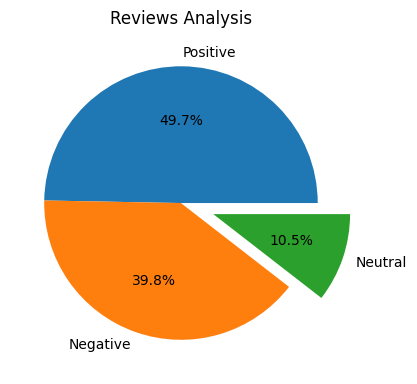

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv('Britain_air')

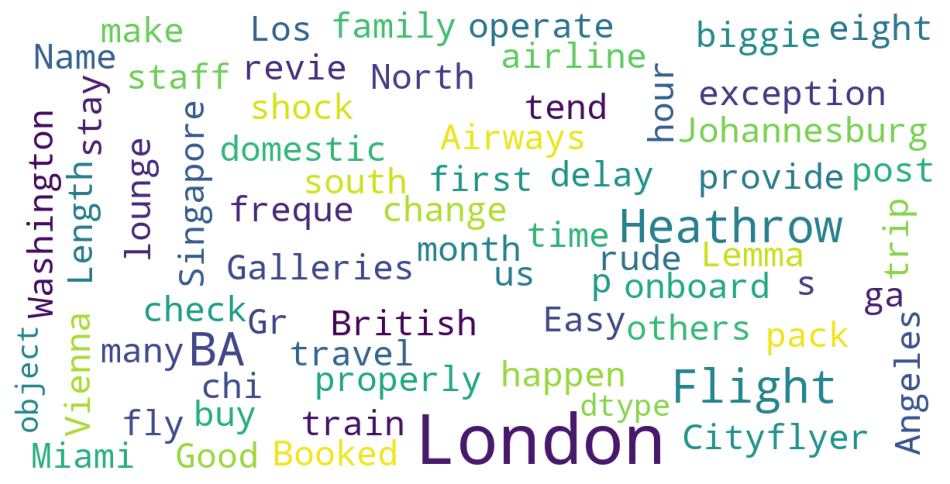

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)